#  Criação e modelagem de machine learning

#### Fazer importações

In [1]:
# Imports
import pandas as pd
from sklearn.utils import shuffle
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
import joblib
import unidecode
from string import punctuation
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix 
import seaborn as sn
import numpy as np 
import matplotlib.pyplot as plt
import pickle

# inicializa o nlp do spacy
nlp = spacy.load("pt_core_news_sm")

#### Leitura da base em JSON

In [2]:
# Ler arquivo Json - arquivo usando com orient=records
comentarios_df = pd.read_json('dataset_for_modeling.json')

comentarios_df

# Cria um dataframe so para os valores das colunas toxico e comentario
#comments_toxico = data.drop(['link','datahora'], axis=1)
#comments_toxico.head()

,toxico,comentario
0,0,"petróleo da Venezuela??? hahahahahahaha, dps ..."
1,0,O regime mais genocida é a religião.
2,0,UÉ?
3,0,"Se alguém é acuso de ""UM"" crime, por ""UMA"" pe..."
4,0,O que temos de concreto é a delação de Marco...
...,...,...
1569,1,"Que apelação! kkkkkkk, rindo até 2022."
1570,1,Eu agora vou dormir!!! Mas vocês não podem!!...
1571,1,Esse nome queiroz é amaldiçoado em?
1572,1,"BoIsotrooper, a GIobo de.ve mais de um biIhão..."


## Aqui começa o pré-processamento

#### Cada pré-processamento foi separado em uma coluna do DataFrame de forma a treinar a ML individualmente para cada coluna do DataFrame

In [3]:
comentarios_df = comentarios_df.replace(r'\n', ' ', regex=True) 
comentarios_df

,toxico,comentario
0,0,"petróleo da Venezuela??? hahahahahahaha, dps ..."
1,0,O regime mais genocida é a religião.
2,0,UÉ?
3,0,"Se alguém é acuso de ""UM"" crime, por ""UMA"" pe..."
4,0,O que temos de concreto é a delação de Marco...
...,...,...
1569,1,"Que apelação! kkkkkkk, rindo até 2022."
1570,1,Eu agora vou dormir!!! Mas vocês não podem!!...
1571,1,Esse nome queiroz é amaldiçoado em?
1572,1,"BoIsotrooper, a GIobo de.ve mais de um biIhão..."


In [4]:
# Transforma todas as letras em minusculo
minusculo = []
for comentario in comentarios_df['comentario']:
    minusculo.append(comentario.lower())
    
comentarios_df['minusculo'] = minusculo

comentarios_df

,toxico,comentario,minusculo
0,0,"petróleo da Venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps ..."
1,0,O regime mais genocida é a religião.,o regime mais genocida é a religião.
2,0,UÉ?,ué?
3,0,"Se alguém é acuso de ""UM"" crime, por ""UMA"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pe..."
4,0,O que temos de concreto é a delação de Marco...,o que temos de concreto é a delação de marco...
...,...,...,...
1569,1,"Que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022."
1570,1,Eu agora vou dormir!!! Mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!...
1571,1,Esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?
1572,1,"BoIsotrooper, a GIobo de.ve mais de um biIhão...","boisotrooper, a giobo de.ve mais de um biihão..."


In [5]:
# Remove espaços em brancos das strings
comentarios_df['whitespacesnone'] = [comentario.strip() for comentario in comentarios_df['minusculo']] # unidecode

comentarios_df

,toxico,comentario,minusculo,whitespacesnone
0,0,"petróleo da Venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps d..."
1,0,O regime mais genocida é a religião.,o regime mais genocida é a religião.,o regime mais genocida é a religião.
2,0,UÉ?,ué?,ué?
3,0,"Se alguém é acuso de ""UM"" crime, por ""UMA"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pes..."
4,0,O que temos de concreto é a delação de Marco...,o que temos de concreto é a delação de marco...,o que temos de concreto é a delação de marcos...
...,...,...,...,...
1569,1,"Que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022."
1570,1,Eu agora vou dormir!!! Mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!!...
1571,1,Esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?
1572,1,"BoIsotrooper, a GIobo de.ve mais de um biIhão...","boisotrooper, a giobo de.ve mais de um biihão...","boisotrooper, a giobo de.ve mais de um biihão ..."


In [6]:
# Remove acentuação
comentarios_df['unidecode'] = [unidecode.unidecode(comentario) for comentario in comentarios_df['whitespacesnone']]

In [7]:
# Remove pontuação, stopwords, números soltos e gera os tokens SEM UNIDECODE
pontuacoes = list(punctuation)
novo_comentario = []
stop_word = list(nlp.Defaults.stop_words) 

for comentario in comentarios_df['whitespacesnone']:
    doc = nlp(comentario)
    c = ' '.join([token.text for token in doc if token.text not in pontuacoes and token.text not in stop_word and not token.text.isdigit()])
    novo_comentario.append(c)
    
comentarios_df['comentario_final_su'] = novo_comentario
comentarios_df

,toxico,comentario,minusculo,whitespacesnone,unidecode,comentario_final_su
0,0,"petróleo da Venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps d...","petroleo da venezuela??? hahahahahahaha, dps d...",petróleo venezuela hahahahahahaha dps dias faz...
1,0,O regime mais genocida é a religião.,o regime mais genocida é a religião.,o regime mais genocida é a religião.,o regime mais genocida e a religiao.,o regime genocida a religião
2,0,UÉ?,ué?,ué?,ue?,ué
3,0,"Se alguém é acuso de ""UM"" crime, por ""UMA"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pes...","se alguem e acuso de ""um"" crime, por ""uma"" pes...",alguém acuso crime pessoa alguém á acusado vár...
4,0,O que temos de concreto é a delação de Marco...,o que temos de concreto é a delação de marco...,o que temos de concreto é a delação de marcos...,o que temos de concreto e a delacao de marcos...,o concreto a delação marcos valério o mentor...
...,...,...,...,...,...,...
1569,1,"Que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022.","que apelacao! kkkkkkk, rindo ate 2022.",apelação kkkkkkk rindo
1570,1,Eu agora vou dormir!!! Mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!!...,eu agora vou dormir!!! mas voces nao podem!!!...,vou dormir o plantão completo senão o dindin
1571,1,Esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?,esse nome queiroz e amaldicoado em?,nome queiroz amaldiçoado
1572,1,"BoIsotrooper, a GIobo de.ve mais de um biIhão...","boisotrooper, a giobo de.ve mais de um biihão...","boisotrooper, a giobo de.ve mais de um biihão ...","boisotrooper, a giobo de.ve mais de um biihao ...",boisotrooper a giobo de.ve biihão o flsc0 e co...


In [8]:
# Remove pontuação, stopwords, números soltos e gera os tokens COM UNIDECODE
pontuacoes = list(punctuation)
novo_comentario = []
stop_word = list(nlp.Defaults.stop_words) 

for comentario in comentarios_df['unidecode']:
    doc = nlp(comentario)
    c = ' '.join([token.text for token in doc if token.text not in pontuacoes and token.text not in stop_word and not token.text.isdigit()])
    novo_comentario.append(c)
    
comentarios_df['comentario_final_wu'] = novo_comentario
comentarios_df

,toxico,comentario,minusculo,whitespacesnone,unidecode,comentario_final_su,comentario_final_wu
0,0,"petróleo da Venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps ...","petróleo da venezuela??? hahahahahahaha, dps d...","petroleo da venezuela??? hahahahahahaha, dps d...",petróleo venezuela hahahahahahaha dps dias faz...,petroleo venezuela hahahahahahaha dps dias faz...
1,0,O regime mais genocida é a religião.,o regime mais genocida é a religião.,o regime mais genocida é a religião.,o regime mais genocida e a religiao.,o regime genocida a religião,o regime genocida e a religiao
2,0,UÉ?,ué?,ué?,ue?,ué,ue
3,0,"Se alguém é acuso de ""UM"" crime, por ""UMA"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pe...","se alguém é acuso de ""um"" crime, por ""uma"" pes...","se alguem e acuso de ""um"" crime, por ""uma"" pes...",alguém acuso crime pessoa alguém á acusado vár...,alguem e acuso crime pessoa e alguem a acusado...
4,0,O que temos de concreto é a delação de Marco...,o que temos de concreto é a delação de marco...,o que temos de concreto é a delação de marcos...,o que temos de concreto e a delacao de marcos...,o concreto a delação marcos valério o mentor...,o concreto e a delacao marcos valerio o ment...
...,...,...,...,...,...,...,...
1569,1,"Que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022.","que apelação! kkkkkkk, rindo até 2022.","que apelacao! kkkkkkk, rindo ate 2022.",apelação kkkkkkk rindo,apelacao kkkkkkk rindo ate
1570,1,Eu agora vou dormir!!! Mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!...,eu agora vou dormir!!! mas vocês não podem!!!...,eu agora vou dormir!!! mas voces nao podem!!!...,vou dormir o plantão completo senão o dindin,vou dormir voces nao o plantao completo s...
1571,1,Esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?,esse nome queiroz é amaldiçoado em?,esse nome queiroz e amaldicoado em?,nome queiroz amaldiçoado,nome queiroz e amaldicoado
1572,1,"BoIsotrooper, a GIobo de.ve mais de um biIhão...","boisotrooper, a giobo de.ve mais de um biihão...","boisotrooper, a giobo de.ve mais de um biihão ...","boisotrooper, a giobo de.ve mais de um biihao ...",boisotrooper a giobo de.ve biihão o flsc0 e co...,boisotrooper a giobo de.ve biihao o flsc0 e co...


In [9]:
# Mistura os dados que estão no DataFrame para não ter vicio
comentarios_df = comentarios_df.sample(frac=1).reset_index(drop=True)
comentarios_df

,toxico,comentario,minusculo,whitespacesnone,unidecode,comentario_final_su,comentario_final_wu
0,0,"Por que do ""português"" ter sido escrito com ""...","por que do ""português"" ter sido escrito com ""...","por que do ""português"" ter sido escrito com ""p...","por que do ""portugues"" ter sido escrito com ""p...",português sido escrito p maiúsculo fessô machado,portugues sido escrito p maiusculo fesso machado
1,0,Seu Papa será que o senhor poderia interceder...,seu papa será que o senhor poderia interceder...,seu papa será que o senhor poderia interceder ...,seu papa sera que o senhor poderia interceder ...,papa será o senhor poderia interceder gente ju...,papa sera o senhor poderia interceder gente ju...
2,1,PRESS BROWN,press brown,press brown,press brown,press brown,press brown
3,1,"Simudapralá, bozopata duzinfernu. Muuuuuuuuuu...","simudapralá, bozopata duzinfernu. muuuuuuuuuu...","simudapralá, bozopata duzinfernu. muuuuuuuuuuu...","simudaprala, bozopata duzinfernu. muuuuuuuuuuu...",simudapralá bozopata duzinfernu muuuuuuuuuuuuu...,simudaprala bozopata duzinfernu muuuuuuuuuuuuu...
4,1,""" a fundando"" ? ""a gora"" ? ele fundou algo? ...",""" a fundando"" ? ""a gora"" ? ele fundou algo? ...",""" a fundando"" ? ""a gora"" ? ele fundou algo? e...",""" a fundando"" ? ""a gora"" ? ele fundou algo? e...",a fundando a gora fundou e o gora criticar a...,a fundando a gora fundou e o gora criticar a...
...,...,...,...,...,...,...,...
1569,1,Você prefere café no filtro ou no Ecu Ador?,você prefere café no filtro ou no ecu ador?,você prefere café no filtro ou no ecu ador?,voce prefere cafe no filtro ou no ecu ador?,prefere café filtro ecu ador,voce prefere cafe filtro ecu ador
1570,1,só o pai dos pobres pode salvar,só o pai dos pobres pode salvar,só o pai dos pobres pode salvar,so o pai dos pobres pode salvar,o pai pobres salvar,so o pai pobres salvar
1571,0,"Bigrifle Guy, o que tem uma coisa com a outra...","bigrifle guy, o que tem uma coisa com a outra...","bigrifle guy, o que tem uma coisa com a outra?...","bigrifle guy, o que tem uma coisa com a outra?...",bigrifle guy o a o rock in rio particular,bigrifle guy o a o rock in rio e particular
1572,1,Não vai ter golpe! (sarcasmo),não vai ter golpe! (sarcasmo),não vai ter golpe! (sarcasmo),nao vai ter golpe! (sarcasmo),golpe sarcasmo,nao golpe sarcasmo


In [10]:
# Transforma tóxico em int
comentarios_df["toxico"] = pd.to_numeric(comentarios_df["toxico"])

In [11]:
# Gera um Json com o dataframe com tratamento 
with open('comentarios_df.json', 'w', encoding='utf-8') as file:
    comentarios_df.to_json(file, force_ascii=False, orient='index')

### Palavras frequentes e visualização

In [12]:
import nltk
from nltk import tokenize
#nltk.download('stopwords') 

todas_palavras = ' '.join([texto for texto in comentarios_df['comentario_final_wu']])
    
tokens = tokenize.WhitespaceTokenizer().tokenize(todas_palavras)

frequencia = nltk.FreqDist(tokens)

df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                             "Frequencia": list(frequencia.values())
                            })

df_frequencia

,Palavras,Frequencia
0,portugues,2
1,sido,8
2,escrito,1
3,p,7
4,maiusculo,1
...,...,...
5397,responsabilizem,1
5398,dano,1
5399,causado,1
5400,coimbra,1


In [13]:
df_frequencia.nlargest(columns=['Frequencia'], n=10)

,Palavras,Frequencia
33,e,1341
9,o,1233
15,a,910
27,nao,510
51,...,294
372,so,174
185,brasil,141
22,pra,124
100,d,104
16,presidente,100


In [14]:
# instalação do pacote 'wordcloud':
# !pip install wordcloud

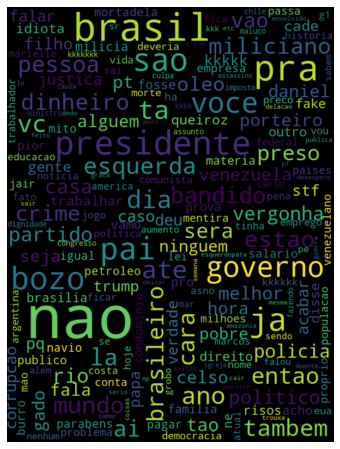

In [15]:
from wordcloud import WordCloud

%matplotlib inline

word_cloud = WordCloud(height=800, width=600, max_font_size=110,
                      collocations=False).generate(todas_palavras)

plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Começa o treino da ML

#### Vai estar separado o treino em base original (em minusculo), base com preprocessamento sem limpeza com unidecode, base com preprocessamento com limpeza de unidecode

In [16]:
### Criar o bagofwords
# base original sem nada
vectorizer = CountVectorizer(analyzer='word', lowercase=False)
bow = vectorizer.fit_transform(comentarios_df['comentario'])

# bow base original
vectorizer_lower = CountVectorizer(analyzer='word', lowercase=False)
bow_lower = vectorizer_lower.fit_transform(comentarios_df['minusculo'])

# bow base original minusculo removendo whitespace
vectorizer_spacelower = CountVectorizer(analyzer='word', lowercase=False)
bow_spacelower = vectorizer_spacelower.fit_transform(comentarios_df['whitespacesnone'])

# bow preprocessamento sem unidecode
vectorizer_su = CountVectorizer(analyzer='word', lowercase=False)
bow_su = vectorizer_su.fit_transform(comentarios_df['comentario_final_su'])

# bow preprocessamento com unidecode
vectorizer_wu = CountVectorizer(analyzer='word', lowercase=False)
bow_wu = vectorizer_wu.fit_transform(comentarios_df['comentario_final_wu'])

In [17]:
### Gerar treino e classe com o train_test_split

# treino e classe base original
treino, teste, classe_treino, classe_teste = train_test_split(bow,
       comentarios_df['toxico'], random_state=42)

# treino e classe base original com letras minusculas 
treino_lower, teste_lower, classe_treino_lower, classe_teste_lower = train_test_split(bow_lower,
       comentarios_df['toxico'], random_state=42)

# treino e classe base com preprocessamento sem unidecode
treino_su, teste_su, classe_treino_su, classe_teste_su = train_test_split(bow_su,
       comentarios_df['toxico'], random_state=42)

# treino e classe base com preprocessamento com unidecode
treino_wu, teste_wu, classe_treino_wu, classe_teste_wu = train_test_split(bow_wu,
       comentarios_df['toxico'], random_state=42)

### Criação dos modelos e treinamento

##### Para cada tipo de modelo foi criado um heatmap de suas matrizes de confusão, gerado precisao e acuracia

### ------------------------------ REGRESSÃO LOGÍSTICA ------------------------------

##### PROCESSO COM REGRESSÃO LOGÍSTICA

In [18]:
# Base original
classificador = LogisticRegression(solver='lbfgs')
classificador.fit(treino, classe_treino)

previsao = classificador.predict(teste)

acuracia = accuracy_score(classe_teste, previsao)
precisao = precision_score(classe_teste, previsao)

print("Acuracia: %.2f%%" % (acuracia * 100.0), "Precisao: %.2f%%" % (precisao * 100.0))

#report = classification_report(previsao, classe_teste)

#print('report:', report, sep='\n')

Acuracia: 63.96% Precisao: 62.50%


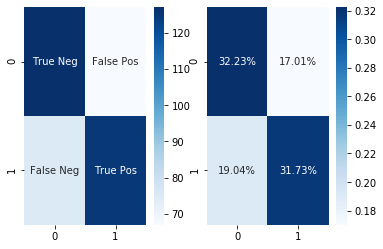

In [19]:
results_classificador = confusion_matrix(previsao, classe_teste) 

labels_classificador = ["True Neg","False Pos","False Neg","True Pos"]
labels_classificador = np.asarray(labels_classificador).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_classificador, annot=labels_classificador, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_classificador/np.sum(results_classificador), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Logistic: ROC AUC=0.711


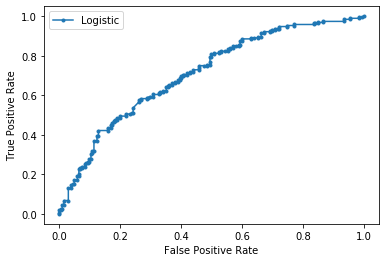

In [20]:
lr_probs = classificador.predict_proba(teste)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(classe_teste, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(classe_teste, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [21]:
# Base original com letras minusculas 
classificador_lower = LogisticRegression(solver='lbfgs')
classificador_lower.fit(treino_lower, classe_treino_lower)

previsao_lower = classificador_lower.predict(teste_lower)

acuracia_lower = accuracy_score(classe_teste_lower, previsao_lower)
precisao_lower = precision_score(classe_teste_lower, previsao_lower)

print("Acuracia: %.2f%%" % (acuracia_lower * 100.0), "Precisao: %.2f%%" % (precisao_lower * 100.0))

Acuracia: 63.20% Precisao: 61.69%


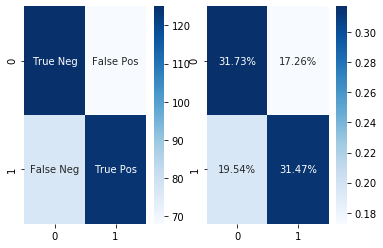

In [22]:
results_classificador_lower = confusion_matrix(previsao_lower, classe_teste_lower) 

labels_classificador_lower = ["True Neg","False Pos","False Neg","True Pos"]
labels_classificador_lower = np.asarray(labels_classificador_lower).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_classificador_lower, annot=labels_classificador_lower, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_classificador_lower/np.sum(results_classificador_lower), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Logistic: ROC AUC=0.688


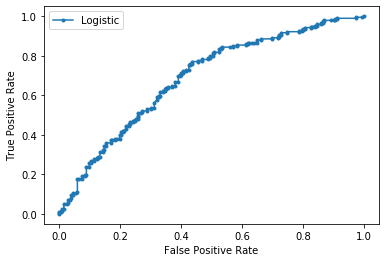

In [23]:
lr_probs_lower = classificador_lower.predict_proba(teste_lower)
lr_probs_lower = lr_probs_lower[:, 1]
lr_auc_lower = roc_auc_score(classe_teste_lower, lr_probs_lower)

print('Logistic: ROC AUC=%.3f' % (lr_auc_lower))

lr_fpr_lower, lr_tpr_lower, _ = roc_curve(classe_teste_lower, lr_probs_lower)
plt.plot(lr_fpr_lower, lr_tpr_lower, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [24]:
# Base com preprocessamento sem unidecode
classificador_su = LogisticRegression(solver='lbfgs')
classificador_su.fit(treino_su, classe_treino_su)

previsao_su = classificador_su.predict(teste_su)

acuracia_su = accuracy_score(classe_teste_su, previsao_su)
precisao_su = precision_score(classe_teste_su, previsao_su)

print("Acuracia: %.2f%%" % (acuracia_su * 100.0), "Precisao: %.2f%%" % (precisao_su * 100.0))

Acuracia: 67.77% Precisao: 66.33%


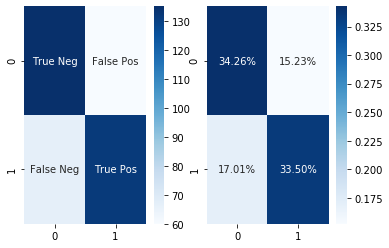

In [25]:
results_classificador_su = confusion_matrix(previsao_su, classe_teste_su) 

labels_classificador_su = ["True Neg","False Pos","False Neg","True Pos"]
labels_classificador_su = np.asarray(labels_classificador_su).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_classificador_su, annot=labels_classificador_su, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_classificador_su/np.sum(results_classificador_su), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Logistic: ROC AUC=0.736


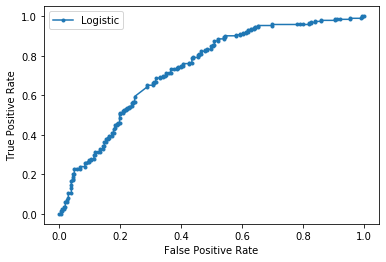

In [26]:
lr_probs_su = classificador_su.predict_proba(teste_su)
lr_probs_su = lr_probs_su[:, 1]
lr_auc_su = roc_auc_score(classe_teste_su, lr_probs_su)

print('Logistic: ROC AUC=%.3f' % (lr_auc_su))

lr_fpr_su, lr_tpr_su, _ = roc_curve(classe_teste_su, lr_probs_su)
plt.plot(lr_fpr_su, lr_tpr_su, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [27]:
# Base com preprocessamento com unidecode
classificador_wu = LogisticRegression(solver='lbfgs')
classificador_wu.fit(treino_wu, classe_treino_wu)

previsao_wu = classificador_wu.predict(teste_wu)

acuracia_wu = accuracy_score(classe_teste_wu, previsao_wu)
precisao_wu = precision_score(classe_teste_wu, previsao_wu)

print("Acuracia: %.2f%%" % (acuracia_wu * 100.0), "Precisao: %.2f%%" % (precisao_wu * 100.0))

Acuracia: 67.51% Precisao: 66.16%


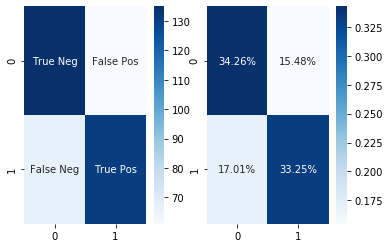

In [28]:
results_classificador_wu = confusion_matrix(previsao_wu, classe_teste_wu) 

labels_classificador_wu = ["True Neg","False Pos","False Neg","True Pos"]
labels_classificador_wu = np.asarray(labels_classificador_wu).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_classificador_wu, annot=labels_classificador_wu, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_classificador_wu/np.sum(results_classificador_wu), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Logistic: ROC AUC=0.730


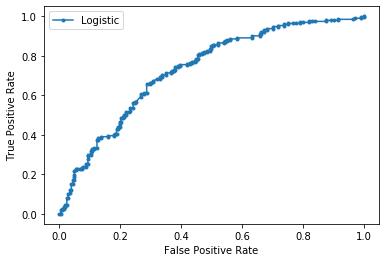

In [29]:
lr_probs_wu = classificador_wu.predict_proba(teste_wu)
lr_probs_wu = lr_probs_wu[:, 1]
lr_auc_wu = roc_auc_score(classe_teste_wu, lr_probs_wu)

print('Logistic: ROC AUC=%.3f' % (lr_auc_wu))

lr_fpr_wu, lr_tpr_wu, _ = roc_curve(classe_teste_wu, lr_probs_wu)
plt.plot(lr_fpr_wu, lr_tpr_wu, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ------------------------------ XGBOOST ------------------------------

##### PROCESSO COM XGBOOST

In [30]:
# Base original 
model = XGBClassifier()
model.fit(treino, classe_treino)

y_pred = model.predict(teste)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(classe_teste, predictions)
precision = precision_score(classe_teste, predictions)

print("Acuracia: %.2f%%" % (accuracy * 100.0), "Precisao: %.2f%%" % (precision * 100.0))

Acuracia: 61.93% Precisao: 59.29%


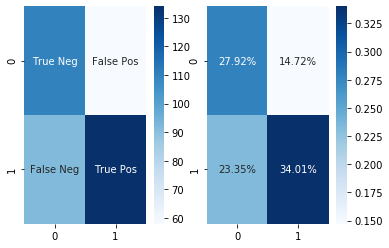

In [31]:
results_model = confusion_matrix(y_pred, classe_teste) 

labels_model = ["True Neg","False Pos","False Neg","True Pos"]
labels_model = np.asarray(labels_model).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_model, annot=labels_model, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_model/np.sum(results_model), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

XGBoost: ROC AUC=0.667


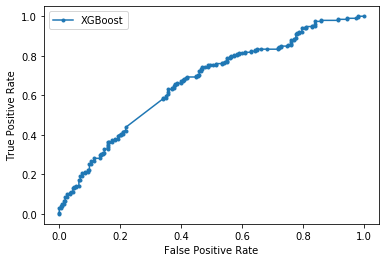

In [32]:
model_probs = model.predict_proba(teste)
model_probs = model_probs[:, 1]
model_auc = roc_auc_score(classe_teste, model_probs)

print('XGBoost: ROC AUC=%.3f' % (model_auc))

model_fpr, model_tpr, _ = roc_curve(classe_teste, model_probs)
plt.plot(model_fpr, model_tpr, marker='.', label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [33]:
# Base original com letras minusculas 
model_lower = XGBClassifier()
model_lower.fit(treino_lower, classe_treino_lower)

y_pred_lower = model_lower.predict(teste_lower)
predictions_lower = [round(value) for value in y_pred_lower]

accuracy_lower = accuracy_score(classe_teste_lower, predictions_lower)
precision_lower = precision_score(classe_teste_lower, predictions_lower)

print("Acuracia: %.2f%%" % (accuracy_lower * 100.0), "Precisao: %.2f%%" % (precision_lower * 100.0))

Acuracia: 59.14% Precisao: 56.83%


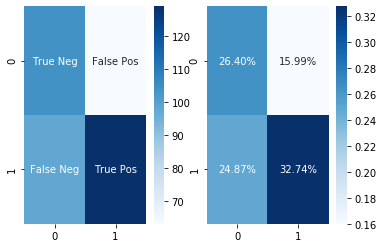

In [34]:
results_model_lower = confusion_matrix(y_pred_lower, classe_teste_lower) 

labels_model_lower = ["True Neg","False Pos","False Neg","True Pos"]
labels_model_lower = np.asarray(labels_model_lower).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_model_lower, annot=labels_model_lower, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_model_lower/np.sum(results_model_lower), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

XGBoost: ROC AUC=0.635


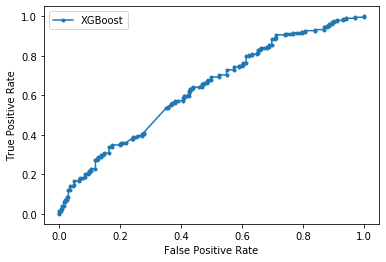

In [35]:
model_probs_lower = model_lower.predict_proba(teste_lower)
model_probs_lower = model_probs_lower[:, 1]
model_auc_lower = roc_auc_score(classe_teste_lower, model_probs_lower)

print('XGBoost: ROC AUC=%.3f' % (model_auc_lower))

model_fpr_lower, model_tpr_lower, _ = roc_curve(classe_teste_lower, model_probs_lower)
plt.plot(model_fpr_lower, model_tpr_lower, marker='.', label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [36]:
# Base com preprocessamento sem unidecode

model_su = XGBClassifier()
model_su.fit(treino_su, classe_treino_su)

y_pred_su = model_su.predict(teste_su)
predictions_su = [round(value) for value in y_pred_su]

accuracy_su = accuracy_score(classe_teste_su, predictions_su)
precision_su = precision_score(classe_teste_su, predictions_su)

print("Acuracia: %.2f%%" % (accuracy_su * 100.0), "Precisao: %.2f%%" % (precision_su * 100.0))

Acuracia: 62.18% Precisao: 59.07%


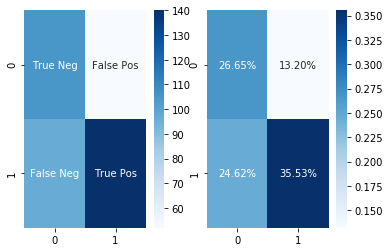

In [37]:
results_model_su = confusion_matrix(y_pred_su, classe_teste_su) 

labels_model_su = ["True Neg","False Pos","False Neg","True Pos"]
labels_model_su = np.asarray(labels_model_su).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_model_su, annot=labels_model_su, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_model_su/np.sum(results_model_su), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

XGBoost: ROC AUC=0.652


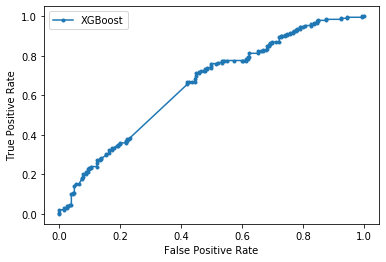

In [38]:
model_probs_su = model_su.predict_proba(teste_su)
model_probs_su = model_probs_su[:, 1]
model_auc_su = roc_auc_score(classe_teste_su, model_probs_su)

print('XGBoost: ROC AUC=%.3f' % (model_auc_su))

model_fpr_su, model_tpr_su, _ = roc_curve(classe_teste_su, model_probs_su)
plt.plot(model_fpr_su, model_tpr_su, marker='.', label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [39]:
# Base com preprocessamento com unidecode
model_wu = XGBClassifier()
model_wu.fit(treino_wu, classe_treino_wu)

y_pred_wu = model_wu.predict(teste_wu)
predictions_wu = [round(value) for value in y_pred_wu]

accuracy_wu = accuracy_score(classe_teste_wu, predictions_wu)
precision_wu = precision_score(classe_teste_wu, predictions_wu)

print("Acuracia: %.2f%%" % (accuracy_su * 100.0), "Precisao: %.2f%%" % (precision_wu * 100.0))

Acuracia: 62.18% Precisao: 58.99%


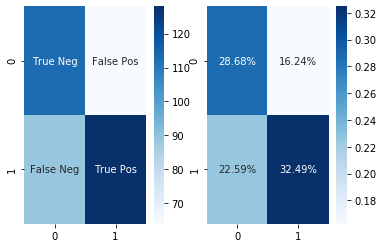

In [40]:
results_model_wu = confusion_matrix(y_pred_wu, classe_teste_wu) 

labels_model_wu = ["True Neg","False Pos","False Neg","True Pos"]
labels_model_wu = np.asarray(labels_model_wu).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_model_wu, annot=labels_model_wu, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_model_wu/np.sum(results_model_wu), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

XGBoost: ROC AUC=0.663


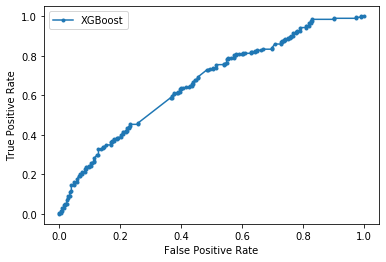

In [41]:
model_probs_wu = model_wu.predict_proba(teste_wu)
model_probs_wu = model_probs_wu[:, 1]
model_auc_wu = roc_auc_score(classe_teste_wu, model_probs_wu)

print('XGBoost: ROC AUC=%.3f' % (model_auc_wu))

model_fpr_wu, model_tpr_wu, _ = roc_curve(classe_teste_wu, model_probs_wu)
plt.plot(model_fpr_wu, model_tpr_wu, marker='.', label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ------------------------------ GRADIENT BOOSTING CLASSIFIER ------------------------------

##### PROCESSO COM GRADIENT BOOSTING CLASSIFIER

In [42]:
# Define possibilidades de valores de aprendizado e identifica qual tras o melhor scrore em acuracia para cada coluna
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

In [43]:
# Coluna base original
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, random_state=42)
    gb.fit(treino, classe_treino)
    print("Coluna base original ------")
    print()
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(treino, classe_treino)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(teste, classe_teste)))
    print()

Coluna base original ------

Learning rate:  0.05
Accuracy score (training): 0.728
Accuracy score (validation): 0.571

Coluna base original ------

Learning rate:  0.1
Accuracy score (training): 0.772
Accuracy score (validation): 0.591

Coluna base original ------

Learning rate:  0.25
Accuracy score (training): 0.853
Accuracy score (validation): 0.645

Coluna base original ------

Learning rate:  0.5
Accuracy score (training): 0.932
Accuracy score (validation): 0.652

Coluna base original ------

Learning rate:  0.75
Accuracy score (training): 0.953
Accuracy score (validation): 0.678

Coluna base original ------

Learning rate:  1
Accuracy score (training): 0.959
Accuracy score (validation): 0.660



In [44]:
# Coluna minusculo
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, random_state=42)
    gb.fit(treino_lower, classe_treino_lower)
    print("Coluna minusculo ------")
    print()
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(treino_lower, classe_treino_lower)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(teste_lower, classe_teste_lower)))
    print()

Coluna minusculo ------

Learning rate:  0.05
Accuracy score (training): 0.700
Accuracy score (validation): 0.586

Coluna minusculo ------

Learning rate:  0.1
Accuracy score (training): 0.768
Accuracy score (validation): 0.609

Coluna minusculo ------

Learning rate:  0.25
Accuracy score (training): 0.846
Accuracy score (validation): 0.627

Coluna minusculo ------

Learning rate:  0.5
Accuracy score (training): 0.908
Accuracy score (validation): 0.619

Coluna minusculo ------

Learning rate:  0.75
Accuracy score (training): 0.933
Accuracy score (validation): 0.635

Coluna minusculo ------

Learning rate:  1
Accuracy score (training): 0.952
Accuracy score (validation): 0.668



In [45]:
# Coluna preprocessamento sem unidecode
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, random_state=42)
    gb.fit(treino_su, classe_treino_su)
    print("Coluna preprocessamento sem unidecode ------")
    print()
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(treino_su, classe_treino_su)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(teste_su, classe_teste_su)))
    print()

Coluna preprocessamento sem unidecode ------

Learning rate:  0.05
Accuracy score (training): 0.710
Accuracy score (validation): 0.591

Coluna preprocessamento sem unidecode ------

Learning rate:  0.1
Accuracy score (training): 0.752
Accuracy score (validation): 0.617

Coluna preprocessamento sem unidecode ------

Learning rate:  0.25
Accuracy score (training): 0.830
Accuracy score (validation): 0.645

Coluna preprocessamento sem unidecode ------

Learning rate:  0.5
Accuracy score (training): 0.873
Accuracy score (validation): 0.635

Coluna preprocessamento sem unidecode ------

Learning rate:  0.75
Accuracy score (training): 0.903
Accuracy score (validation): 0.660

Coluna preprocessamento sem unidecode ------

Learning rate:  1
Accuracy score (training): 0.932
Accuracy score (validation): 0.657



In [46]:
# Coluna preprocessamento com unidecode
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, random_state=42)
    gb.fit(treino_wu, classe_treino_wu)
    print("Coluna preprocessamento com unidecode ------")
    print()
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(treino_wu, classe_treino_wu)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(teste_wu, classe_teste_wu)))
    print()

Coluna preprocessamento com unidecode ------

Learning rate:  0.05
Accuracy score (training): 0.702
Accuracy score (validation): 0.563

Coluna preprocessamento com unidecode ------

Learning rate:  0.1
Accuracy score (training): 0.747
Accuracy score (validation): 0.596

Coluna preprocessamento com unidecode ------

Learning rate:  0.25
Accuracy score (training): 0.823
Accuracy score (validation): 0.604

Coluna preprocessamento com unidecode ------

Learning rate:  0.5
Accuracy score (training): 0.875
Accuracy score (validation): 0.662

Coluna preprocessamento com unidecode ------

Learning rate:  0.75
Accuracy score (training): 0.907
Accuracy score (validation): 0.665

Coluna preprocessamento com unidecode ------

Learning rate:  1
Accuracy score (training): 0.925
Accuracy score (validation): 0.627



In [47]:
# Base original 
gb = GradientBoostingClassifier(learning_rate = 0.75, random_state = 42)
gb.fit(treino, classe_treino)
predictions = gb.predict(teste)

accuracy0 = accuracy_score(classe_teste, predictions)
precision0 = precision_score(classe_teste, predictions)
print("Acuracia: %.2f%%" % (accuracy0 * 100.0), "Precisao: %.2f%%" % (precision0 * 100.0))

Acuracia: 67.77% Precisao: 63.60%


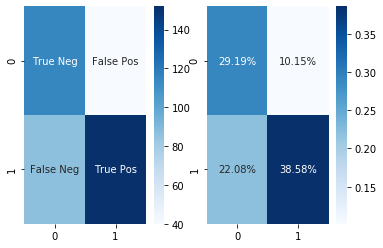

In [48]:
results_gb = confusion_matrix(predictions, classe_teste) 

labels_gb = ["True Neg","False Pos","False Neg","True Pos"]
labels_gb = np.asarray(labels_gb).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_gb, annot=labels_gb, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_gb/np.sum(results_gb), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Gradient Boosting: ROC AUC=0.707


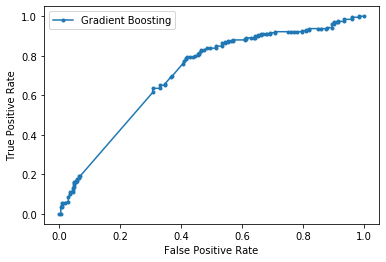

In [49]:
gb_probs = gb.predict_proba(teste)
gb_probs = gb_probs[:, 1]
gb_auc = roc_auc_score(classe_teste, gb_probs)

print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc))

gb_fpr, gb_tpr, _ = roc_curve(classe_teste, gb_probs)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
# Base original com letras minusculas 
gb_lower = GradientBoostingClassifier(learning_rate = 0.5, random_state = 42)
gb_lower.fit(treino_lower, classe_treino_lower)
predictions_lower = gb_lower.predict(teste_lower)

accuracy1 = accuracy_score(classe_teste_lower, predictions_lower)
precision1 = precision_score(classe_teste_lower, predictions_lower)
print("Acuracia: %.2f%%" % (accuracy1 * 100.0), "Precisao: %.2f%%" % (precision1 * 100.0))

Acuracia: 61.93% Precisao: 59.38%


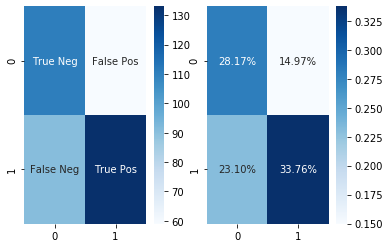

In [51]:
results_gb_lower = confusion_matrix(predictions_lower, classe_teste_lower) 

labels_gb_lower = ["True Neg","False Pos","False Neg","True Pos"]
labels_gb_lower = np.asarray(labels_gb_lower).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_gb_lower, annot=labels_gb_lower, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_gb_lower/np.sum(results_gb_lower), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Gradient Boosting: ROC AUC=0.658


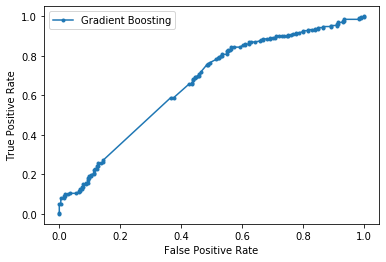

In [52]:
gb_probs_lower = gb_lower.predict_proba(teste_lower)
gb_probs_lower = gb_probs_lower[:, 1]
gb_auc_lower = roc_auc_score(classe_teste_lower, gb_probs_lower)

print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc_lower))

gb_fpr_lower, gb_tpr_lower, _ = roc_curve(classe_teste_lower, gb_probs_lower)
plt.plot(gb_fpr_lower, gb_tpr_lower, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [53]:
# Base com preprocessamento sem unidecode
gb_su = GradientBoostingClassifier(learning_rate = 0.5, random_state = 42)
gb_su.fit(treino_su, classe_treino_su)
predictions_su = gb_su.predict(teste_su)

accuracy2 = accuracy_score(classe_teste_su, predictions_su)
precision2 = precision_score(classe_teste_su, predictions_su)
print("Acuracia: %.2f%%" % (accuracy2 * 100.0), "Precisao: %.2f%%" % (precision2 * 100.0))

Acuracia: 63.45% Precisao: 59.23%


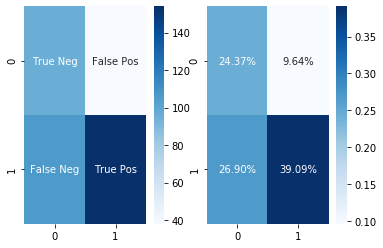

In [54]:
results_gb_su = confusion_matrix(predictions_su, classe_teste_su) 

labels_gb_su = ["True Neg","False Pos","False Neg","True Pos"]
labels_gb_su = np.asarray(labels_gb_su).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_gb_su, annot=labels_gb_su, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_gb_su/np.sum(results_gb_su), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Gradient Boosting: ROC AUC=0.662


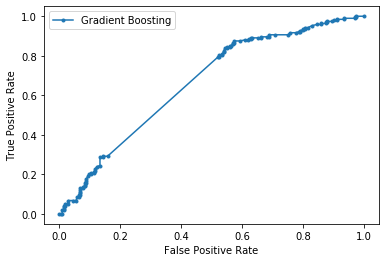

In [55]:
gb_probs_su = gb_su.predict_proba(teste_su)
gb_probs_su = gb_probs_su[:, 1]
gb_auc_su = roc_auc_score(classe_teste_su, gb_probs_su)

print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc_su))

gb_fpr_su, gb_tpr_su, _ = roc_curve(classe_teste_su, gb_probs_su)
plt.plot(gb_fpr_su, gb_tpr_su, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [56]:
# Base com preprocessamento com unidecode
gb_wu = GradientBoostingClassifier(learning_rate = 0.5, random_state = 42)
gb_wu.fit(treino_wu, classe_treino_wu)
predictions_wu = gb_wu.predict(teste_wu)

accuracy3 = accuracy_score(classe_teste_wu, predictions_wu)
precision3 = precision_score(classe_teste_wu, predictions_wu)
print("Acuracia: %.2f%%" % (accuracy3 * 100.0), "Precisao: %.2f%%" % (precision3 * 100.0))

Acuracia: 66.24% Precisao: 62.14%


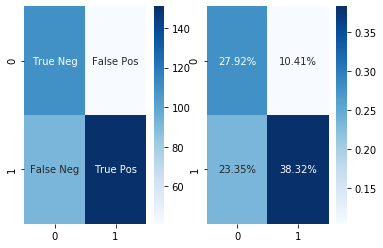

In [57]:
results_gb_wu = confusion_matrix(predictions_wu, classe_teste_wu) 

labels_gb_wu = ["True Neg","False Pos","False Neg","True Pos"]
labels_gb_wu = np.asarray(labels_gb_wu).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_gb_wu, annot=labels_gb_wu, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_gb_wu/np.sum(results_gb_wu), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

Gradient Boosting: ROC AUC=0.707


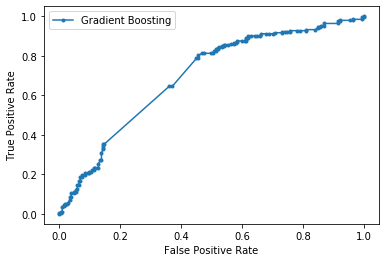

In [58]:
gb_probs_wu = gb_wu.predict_proba(teste_wu)
gb_probs_wu = gb_probs_wu[:, 1]
gb_auc_wu = roc_auc_score(classe_teste_wu, gb_probs)

print('Gradient Boosting: ROC AUC=%.3f' % (gb_auc_wu))

gb_fpr_wu, gb_tpr_wu, _ = roc_curve(classe_teste_wu, gb_probs_wu)
plt.plot(gb_fpr_wu, gb_tpr_wu, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ------------------------------ BERNOULLI NB - NAIVE BAYES ------------------------------

##### PROCESSO COM BERNOULLI NB - NAIVE BAYES

In [59]:
# Base original 
clf = BernoulliNB()
clf.fit(treino, classe_treino)

predictions_clf = clf.predict(teste)

accuracy_clf = accuracy_score(classe_teste, predictions_clf)
precision_clf = precision_score(classe_teste, predictions_clf)

print("Acuracia: %.2f%%" % (accuracy_clf * 100.0), "Precisao: %.2f%%" % (precision_clf * 100.0))

Acuracia: 61.68% Precisao: 58.80%


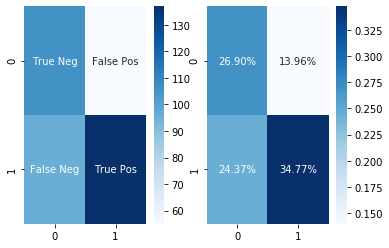

In [60]:
results_clf = confusion_matrix(predictions_clf, classe_teste) 

labels_clf = ["True Neg","False Pos","False Neg","True Pos"]
labels_clf = np.asarray(labels_clf).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_clf, annot=labels_clf, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_clf/np.sum(results_clf), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

BERNOULLI NB: ROC AUC=0.684


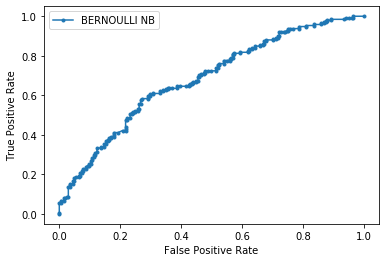

In [61]:
clf_probs = clf.predict_proba(teste)
clf_probs = clf_probs[:, 1]
clf_auc = roc_auc_score(classe_teste, clf_probs)

print('BERNOULLI NB: ROC AUC=%.3f' % (clf_auc))

clf_fpr, clf_tpr, _ = roc_curve(classe_teste, clf_probs)
plt.plot(clf_fpr, clf_tpr, marker='.', label='BERNOULLI NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [62]:
# Base original com letras minusculas
clf_lower = BernoulliNB()
clf_lower.fit(treino_lower, classe_treino_lower)

predictions_clf_lower = clf_lower.predict(teste_lower)

accuracy_clf_lower = accuracy_score(classe_teste_lower, predictions_clf_lower)
precision_clf_lower = precision_score(classe_teste_lower, predictions_clf_lower)

print("Acuracia: %.2f%%" % (accuracy_clf_lower * 100.0), "Precisao: %.2f%%" % (precision_clf_lower * 100.0))

Acuracia: 63.96% Precisao: 60.33%


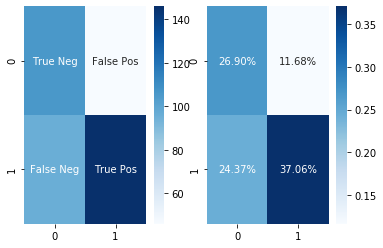

In [63]:
results_clf_lower = confusion_matrix(predictions_clf_lower, classe_teste_lower) 

labels_clf_lower = ["True Neg","False Pos","False Neg","True Pos"]
labels_clf_lower = np.asarray(labels_clf_lower).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_clf_lower, annot=labels_clf_lower, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_clf_lower/np.sum(results_clf_lower), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

BERNOULLI NB: ROC AUC=0.688


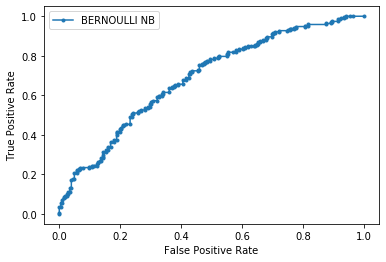

In [64]:
clf_probs_lower = clf_lower.predict_proba(teste_lower)
clf_probs_lower = clf_probs_lower[:, 1]
clf_auc_lower = roc_auc_score(classe_teste_lower, clf_probs_lower)

print('BERNOULLI NB: ROC AUC=%.3f' % (clf_auc_lower))

clf_fpr_lower, clf_tpr_lower, _ = roc_curve(classe_teste_lower, clf_probs_lower)
plt.plot(clf_fpr_lower, clf_tpr_lower, marker='.', label='BERNOULLI NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [65]:
# Base com preprocessamento sem unidecode
clf_su = BernoulliNB()
clf_su.fit(treino_su, classe_treino_su)

predictions_clf_su = clf_su.predict(teste_su)

accuracy_clf_su = accuracy_score(classe_teste_su, predictions_clf_su)
precision_clf_su = precision_score(classe_teste_su, predictions_clf_su)

print("Acuracia: %.2f%%" % (accuracy_clf_su * 100.0), "Precisao: %.2f%%" % (precision_clf_su * 100.0))

Acuracia: 65.99% Precisao: 62.08%


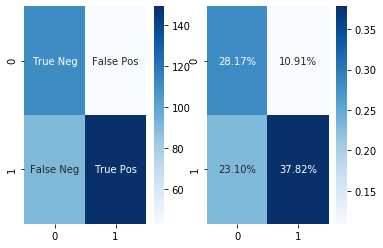

In [66]:
results_clf_su = confusion_matrix(predictions_clf_su, classe_teste_su) 

labels_clf_su = ["True Neg","False Pos","False Neg","True Pos"]
labels_clf_su = np.asarray(labels_clf_su).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_clf_su, annot=labels_clf_su, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_clf_su/np.sum(results_clf_su), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

BERNOULLI NB: ROC AUC=0.723


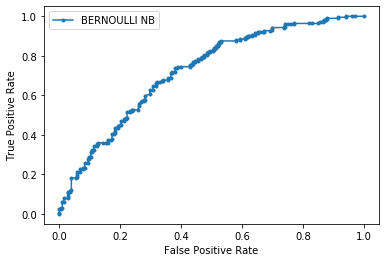

In [67]:
clf_probs_su = clf_su.predict_proba(teste_su)
clf_probs_su = clf_probs_su[:, 1]
clf_auc_su = roc_auc_score(classe_teste_su, clf_probs_su)

print('BERNOULLI NB: ROC AUC=%.3f' % (clf_auc_su))

clf_fpr_su, clf_tpr_su, _ = roc_curve(classe_teste_su, clf_probs_su)
plt.plot(clf_fpr_su, clf_tpr_su, marker='.', label='BERNOULLI NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [68]:
# Base com preprocessamento com unidecode
clf_wu = BernoulliNB()
clf_wu.fit(treino_wu, classe_treino_wu)

predictions_clf_wu = clf_wu.predict(teste_wu)

accuracy_clf_wu = accuracy_score(classe_teste_wu, predictions_clf_wu)
precision_clf_wu = precision_score(classe_teste_wu, predictions_clf_wu)

print("Acuracia: %.2f%%" % (accuracy_clf_wu * 100.0), "Precisao: %.2f%%" % (precision_clf_wu * 100.0))

Acuracia: 65.74% Precisao: 61.83%


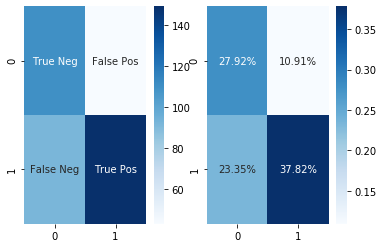

In [69]:
results_clf_wu = confusion_matrix(predictions_clf_wu, classe_teste_wu) 

labels_clf_wu = ["True Neg","False Pos","False Neg","True Pos"]
labels_clf_wu = np.asarray(labels_clf_su).reshape(2,2)

fig, axs = plt.subplots(ncols=2)

sn.heatmap(results_clf_wu, annot=labels_clf_wu, fmt="", cmap='Blues', ax=axs[0])

sn.heatmap(results_clf_wu/np.sum(results_clf_wu), annot=True, 
            fmt='.2%', cmap='Blues', ax=axs[1])

BERNOULLI NB: ROC AUC=0.717


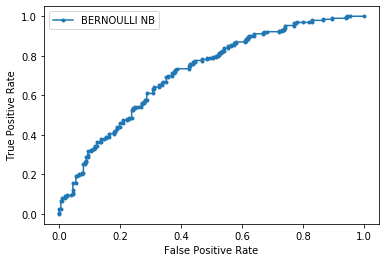

In [70]:
clf_probs_wu = clf_wu.predict_proba(teste_wu)
clf_probs_wu = clf_probs_wu[:, 1]
clf_auc_wu = roc_auc_score(classe_teste_wu, clf_probs_wu)

print('BERNOULLI NB: ROC AUC=%.3f' % (clf_auc_wu))

clf_fpr_wu, clf_tpr_wu, _ = roc_curve(classe_teste_wu, clf_probs_wu)
plt.plot(clf_fpr_wu, clf_tpr_wu, marker='.', label='BERNOULLI NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Salva os modelos com pickle

In [71]:
joblib.dump(classificador_lower, 'lr_classificador_lower.pkl')
joblib.dump(vectorizer_lower, 'cv_lower.pkl')
print("Modelo regressao logistica lower")
#lr_lower = joblib.load('lr_classificador_lower.pkl')

Modelo regressao logistica lower


In [72]:
model_loaded = open('lr_classificador_lower.pkl', 'rb')
cv_loaded = open('cv_lower.pkl', 'rb')
clf = joblib.load(model_loaded)
cvteste = joblib.load(cv_loaded)

datateste = ['sera possivel que sempre vai dar 1 acho que ta viciado']
vectteste = cvteste.transform(datateste).toarray()
predictteste = clf.predict(vectteste)

print(predictteste)

[0]


In [73]:
joblib.dump(classificador_wu, 'lr_classificador_wu.pkl')
joblib.dump(vectorizer_wu, 'cv_wu.pkl')
print("Modelo regressao logistica wu")
#lr_lower = joblib.load('lr_classificador_lower.pkl')

Modelo regressao logistica wu


In [74]:
model_loaded2 = open('lr_classificador_wu.pkl', 'rb')
cv_loaded2 = open('cv_wu.pkl', 'rb')
clf2 = joblib.load(model_loaded2)
cvteste2 = joblib.load(cv_loaded2)

datateste2 = ['sera possivel que sempre vai dar 1 acho que ta viciado']

#doc2 = nlp(datateste2)
#c2 = ' '.join([token.text for token in doc2 if token.text not in pontuacoes and token.text not in stop_word and not token.text.isdigit()])
    
vectteste2 = cvteste2.transform(datateste2).toarray()
predictteste2 = clf2.predict(vectteste2)

print(predictteste2)

[0]


In [75]:
joblib.dump(classificador_su, 'lr_classificador_su.pkl')
joblib.dump(vectorizer_su, 'cv_su.pkl')
print("Modelo regressao logistica su")
#lr_lower = joblib.load('lr_classificador_lower.pkl')

Modelo regressao logistica su


In [76]:
model_loaded3 = open('lr_classificador_su.pkl', 'rb')
cv_loaded3 = open('cv_su.pkl', 'rb')
clf3 = joblib.load(model_loaded3)
cvteste3 = joblib.load(cv_loaded3)

datateste3 = ['sera possivel que sempre vai dar 1 acho que ta viciado']
vectteste3 = cvteste3.transform(datateste3).toarray()
predictteste3 = clf3.predict(vectteste3)

print(predictteste3)

[1]
